# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Dataset yang digunakan**: Iris Dataset dari UCI Machine Learning Repository

**Deskripsi**: Dataset klasifikasi bunga iris dengan 3 spesies (setosa, versicolor, virginica) berdasarkan 4 fitur pengukuran (sepal length, sepal width, petal length, petal width).

**Sumber**: https://archive.ics.uci.edu/ml/datasets/iris

**Jumlah Sampel**: 150 sampel
**Jumlah Fitur**: 4 fitur numerik
**Target**: 3 kelas (species)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Import library untuk data manipulation dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import library untuk modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Setting visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimport!")

Library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat dataset Iris
iris = load_iris()

# Konversi ke DataFrame untuk kemudahan analisis
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Simpan dataset raw
df.to_csv('iris_raw.csv', index=False)

print("Dataset berhasil dimuat!")
print(f"Ukuran dataset: {df.shape}")
print("\nSampel 5 baris pertama:")
df.head()

Dataset berhasil dimuat!
Ukuran dataset: (150, 6)

Sampel 5 baris pertama:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

INFORMASI DATASET

Jumlah baris: 150
Jumlah kolom: 6

Tipe data:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object

Informasi statistik:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238  

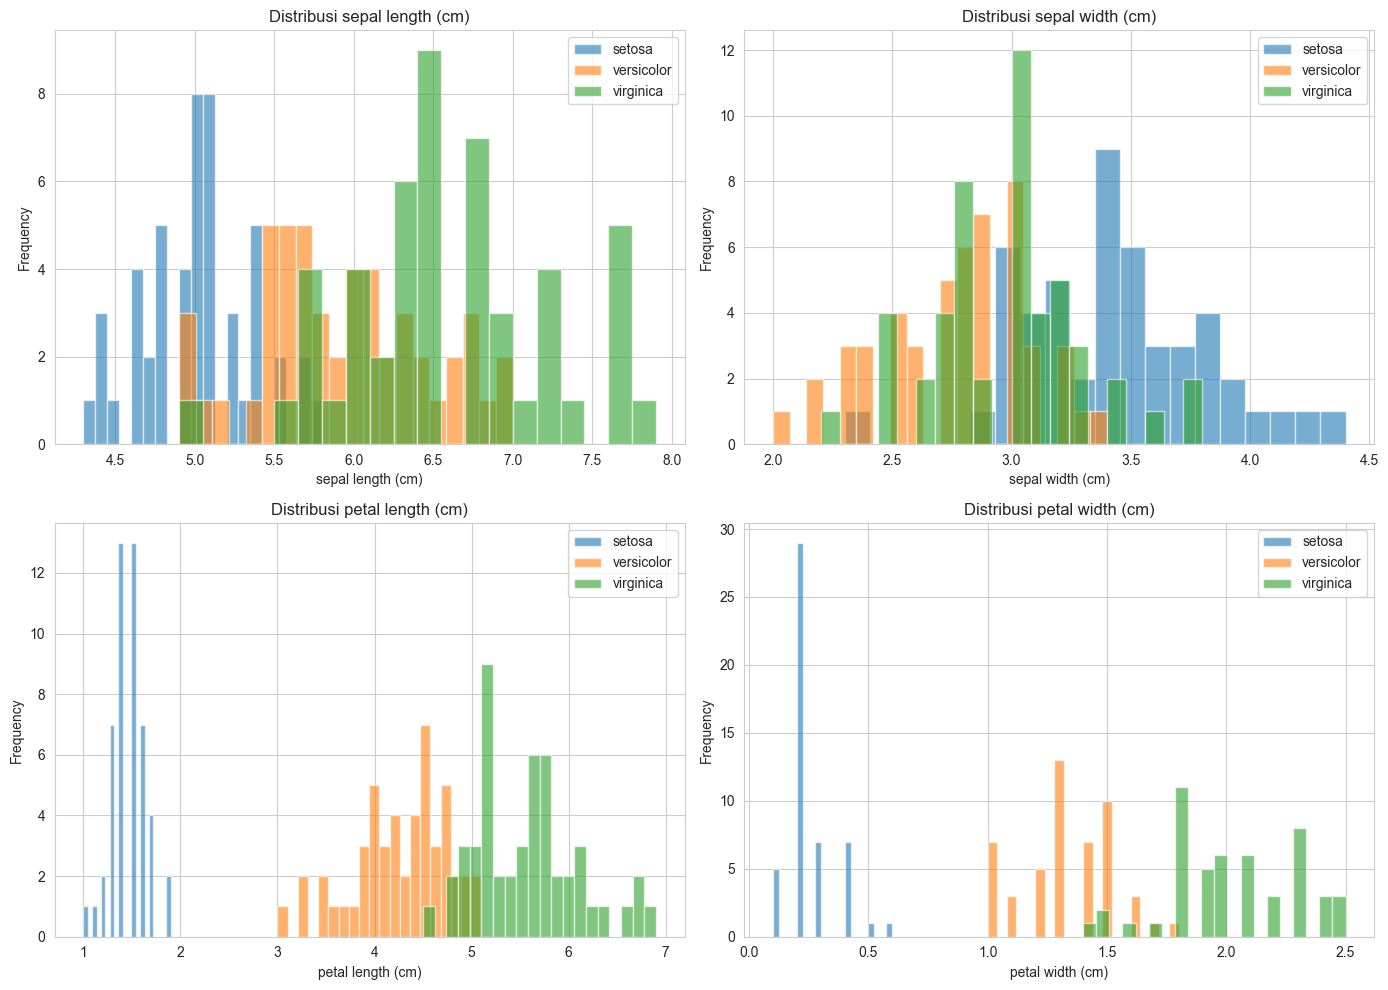


KORELASI ANTAR FITUR


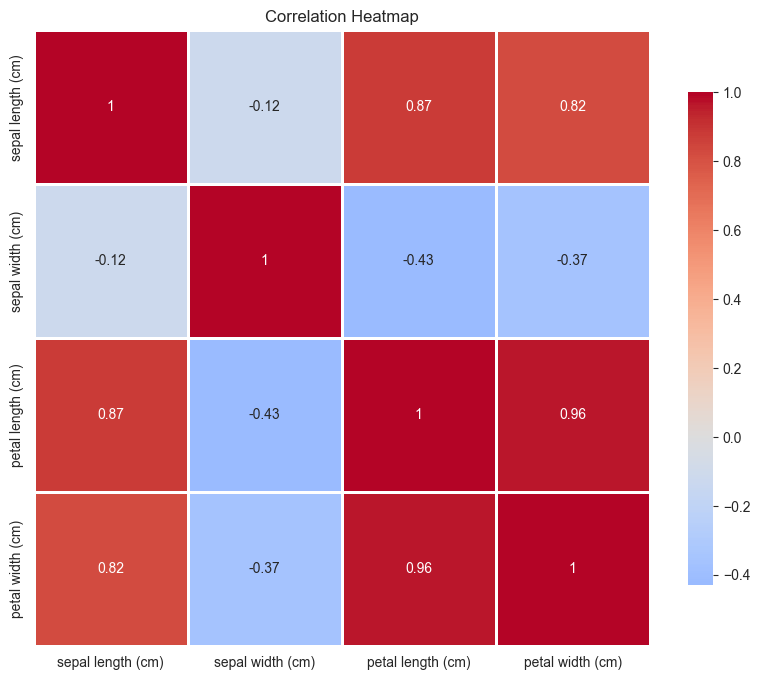


Membuat Pairplot...


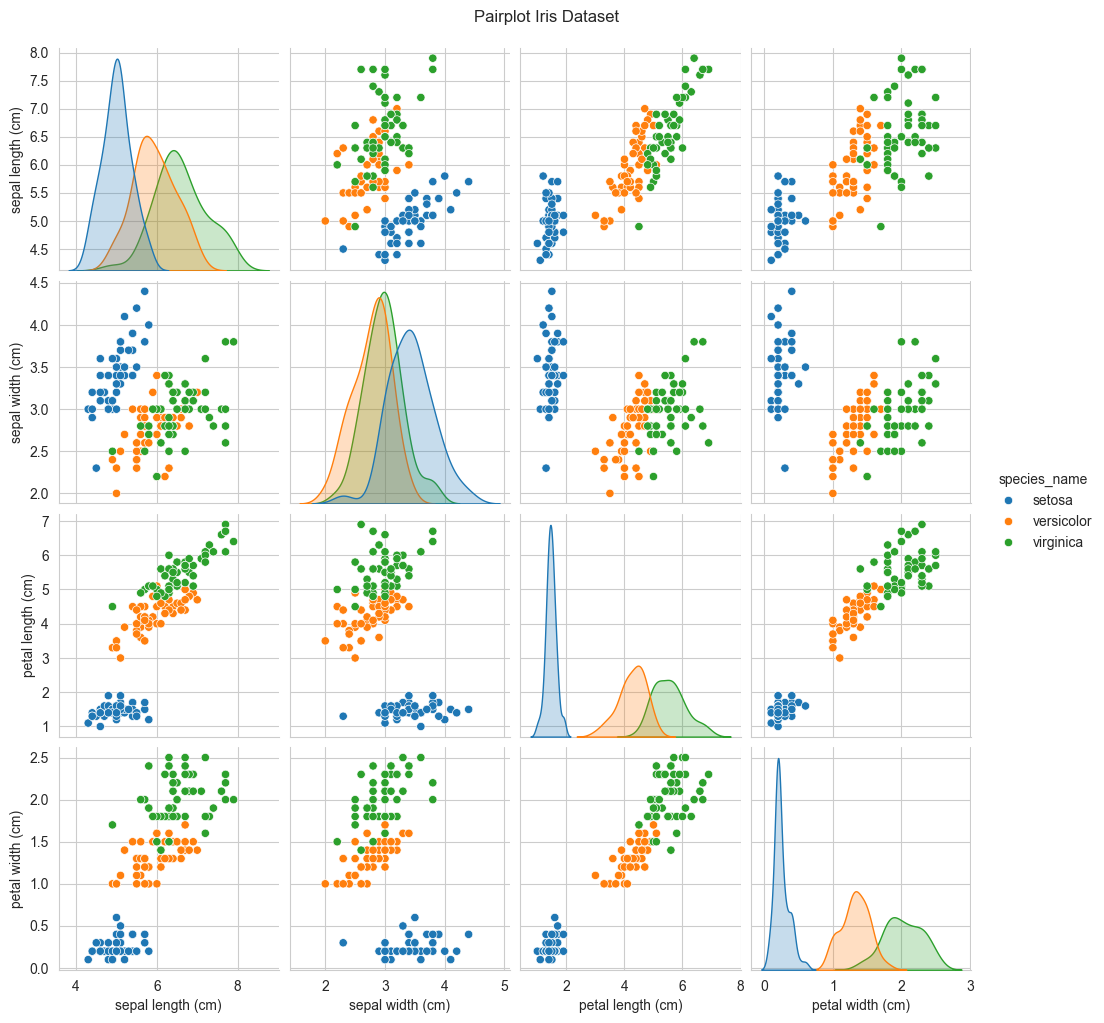

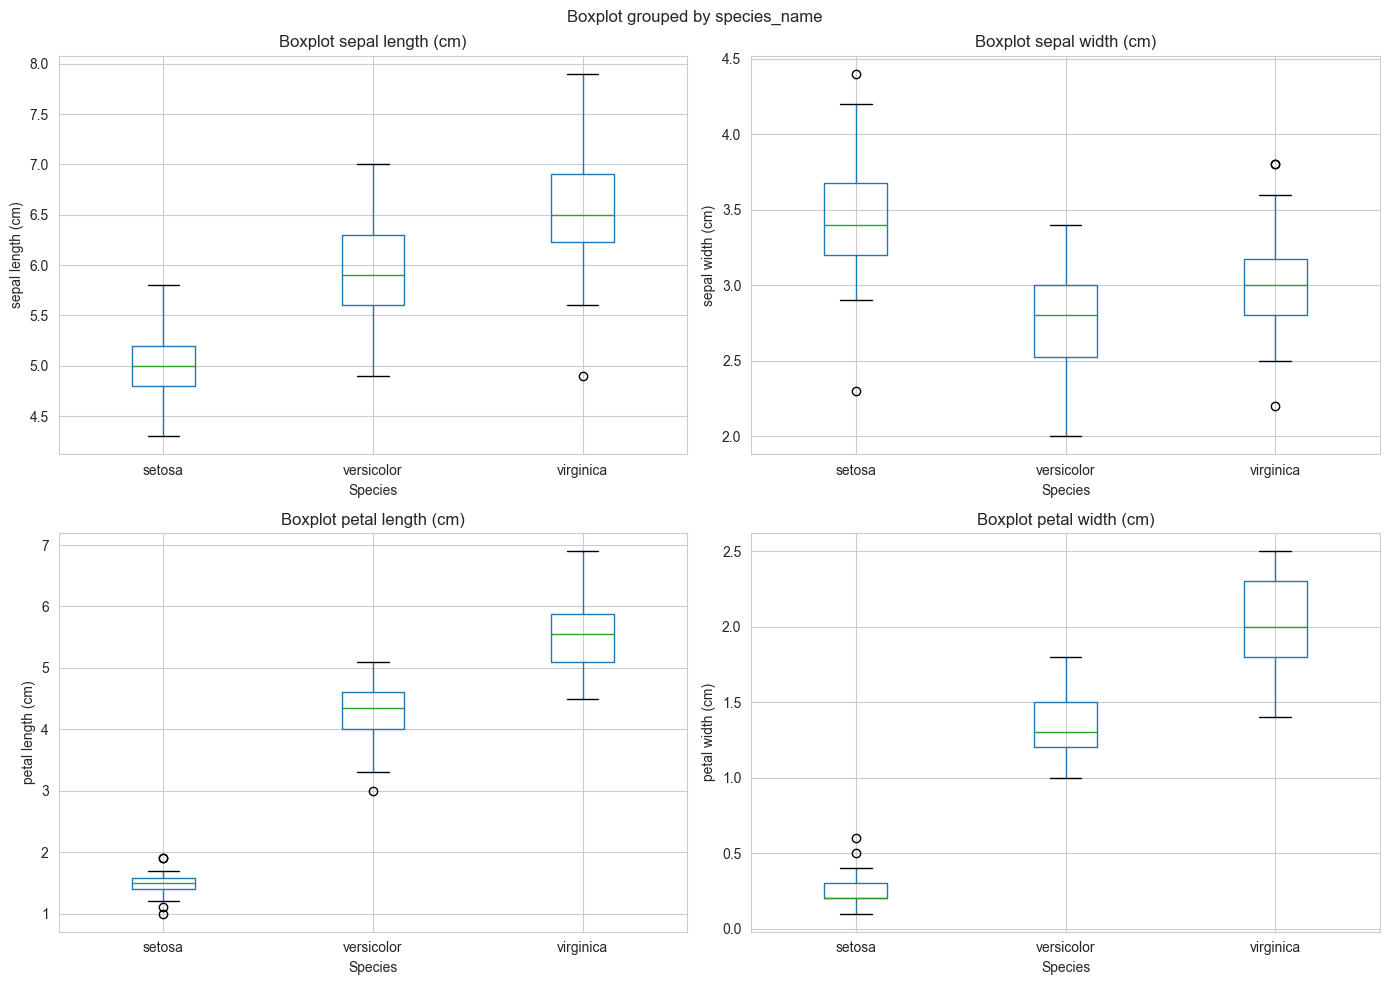

In [3]:
# 4.1 Informasi Dasar Dataset
print("=" * 50)
print("INFORMASI DATASET")
print("=" * 50)
print(f"\nJumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print("\nTipe data:")
print(df.dtypes)
print("\nInformasi statistik:")
print(df.describe())

# 4.2 Cek Missing Values
print("\n" + "=" * 50)
print("CEK MISSING VALUES")
print("=" * 50)
print(df.isnull().sum())

# 4.3 Cek Data Duplikat
print("\n" + "=" * 50)
print("CEK DATA DUPLIKAT")
print("=" * 50)
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

# 4.4 Distribusi Kelas Target
print("\n" + "=" * 50)
print("DISTRIBUSI KELAS TARGET")
print("=" * 50)
print(df['species_name'].value_counts())

# 4.5 Visualisasi Distribusi Fitur
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for idx, col in enumerate(feature_cols):
    ax = axes[idx // 2, idx % 2]
    for species in df['species_name'].unique():
        subset = df[df['species_name'] == species]
        ax.hist(subset[col], alpha=0.6, label=species, bins=20)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribusi {col}')
    ax.legend()

plt.tight_layout()
plt.show()

# 4.6 Correlation Heatmap
print("\n" + "=" * 50)
print("KORELASI ANTAR FITUR")
print("=" * 50)
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap')
plt.show()

# 4.7 Pairplot
print("\nMembuat Pairplot...")
sns.pairplot(df, hue='species_name', vars=feature_cols, diag_kind='kde')
plt.suptitle('Pairplot Iris Dataset', y=1.02)
plt.show()

# 4.8 Boxplot untuk deteksi outlier
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for idx, col in enumerate(feature_cols):
    ax = axes[idx // 2, idx % 2]
    df.boxplot(column=col, by='species_name', ax=ax)
    ax.set_title(f'Boxplot {col}')
    ax.set_xlabel('Species')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
# 5.1 Handling Missing Values (jika ada)
print("Sebelum preprocessing:")
print(f"Missing values: {df.isnull().sum().sum()}")

# Pada dataset Iris tidak ada missing values, tapi ini contoh penanganannya
# df = df.dropna()  # atau df.fillna(method='ffill')

# 5.2 Handling Duplicates
print(f"Data duplikat sebelum dihapus: {df.duplicated().sum()}")
df_clean = df.drop_duplicates()
print(f"Data duplikat setelah dihapus: {df_clean.duplicated().sum()}")

# 5.3 Feature Selection - Pisahkan fitur dan target
X = df_clean[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_clean['species']

print(f"\nUkuran X: {X.shape}")
print(f"Ukuran y: {y.shape}")

# 5.4 Split Data - Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nX_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# 5.5 Feature Scaling - Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame untuk kemudahan
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nContoh data setelah scaling:")
print(X_train_scaled.head())

# 5.6 Simpan data yang sudah dipreprocessing
# Gabungkan X dan y untuk disimpan
train_preprocessed = X_train_scaled.copy()
train_preprocessed['species'] = y_train.values

test_preprocessed = X_test_scaled.copy()
test_preprocessed['species'] = y_test.values

# Simpan ke CSV
train_preprocessed.to_csv('iris_preprocessing/iris_train_preprocessed.csv', index=False)
test_preprocessed.to_csv('iris_preprocessing/iris_test_preprocessed.csv', index=False)

print("\n" + "=" * 50)
print("PREPROCESSING SELESAI!")
print("=" * 50)
print("File disimpan:")
print("- iris_train_preprocessed.csv")
print("- iris_test_preprocessed.csv")

Sebelum preprocessing:
Missing values: 0
Data duplikat sebelum dihapus: 1
Data duplikat setelah dihapus: 0

Ukuran X: (149, 4)
Ukuran y: (149,)

X_train: (119, 4)
X_test: (30, 4)
y_train: (119,)
y_test: (30,)

Contoh data setelah scaling:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.501587          0.769031          -1.339093         -1.179737
1           0.639824         -0.586742           1.041834          1.186365
2          -0.192947         -0.134818           0.248192          0.003314
3          -0.906751          1.672881          -1.055649         -1.048287
4          -1.263653          0.091144          -1.225715         -1.311187

PREPROCESSING SELESAI!
File disimpan:
- iris_train_preprocessed.csv
- iris_test_preprocessed.csv


# **6. Simpan Preprocessing Artifacts**

Simpan objek scaler untuk digunakan pada tahap deployment.

In [5]:
import joblib

# Simpan scaler untuk digunakan saat inference
joblib.dump(scaler, 'scaler.pkl')

print("Scaler berhasil disimpan sebagai 'scaler.pkl'")

Scaler berhasil disimpan sebagai 'scaler.pkl'
